In [1]:
import numpy as np
import scipy as sp
import constants as c
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from simu import Simu

In [2]:
simulation = Simu()
simulation.particle.a = 1.0e-5
simulation.initalize()
simulation.update()

In [3]:
r_grid = simulation.disk.r_grid/c.AU
z_grid = simulation.disk.z_grid/c.AU
r_plot,z_plot = np.meshgrid(z_grid, r_grid)

hg = simulation.disk.gas.h_1d/c.AU

rho_g = simulation.disk.gas.rho_2d

In [4]:
simulation.run(t_tot=10000) #run the simulation for t_tot years
data = simulation.parameters.data #[t,z,r,a]

#### Plot

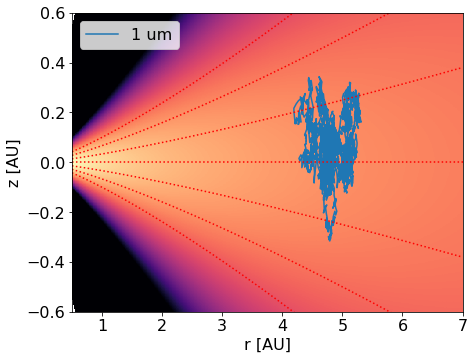

In [5]:
font = {'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)

amin = np.min(rho_g)
amax = np.max(rho_g)

plt.figure(figsize=(7,5.5))
plt.pcolormesh(z_plot, r_plot, rho_g,norm=colors.LogNorm(vmin=1.0e-20, vmax=amax), cmap='magma')
plt.plot(data[:,2]/c.AU,data[:,1]/c.AU,label='1 um')

#plot the disk scale heights
plt.plot(r_grid,0.*hg,color='r',linestyle=':')
plt.plot(r_grid,1.*hg,color='r',linestyle=':')
plt.plot(r_grid,2.*hg,color='r',linestyle=':')
plt.plot(r_grid,3.*hg,color='r',linestyle=':')
plt.plot(r_grid,-1.*hg,color='r',linestyle=':')
plt.plot(r_grid,-2.*hg,color='r',linestyle=':')
plt.plot(r_grid,-3.*hg,color='r',linestyle=':')


plt.ylim(simulation.disk.z_min/c.AU,simulation.disk.z_max/c.AU)
plt.xlim(simulation.disk.r_min/c.AU,simulation.disk.r_max/c.AU)
plt.xlabel('r [AU]')
plt.ylabel('z [AU]')
plt.legend()
#plt.grid()
plt.show()